before : label is:[6]
after : label is:[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


c:\Users\rekha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1623 - loss: 2.5227 - val_accuracy: 0.1780 - val_loss: 2.1100
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1835 - loss: 2.0679 - val_accuracy: 0.1740 - val_loss: 2.0924
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1839 - loss: 2.0635 - val_accuracy: 0.1881 - val_loss: 2.0862
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1820 - loss: 2.0653 - val_accuracy: 0.1780 - val_loss: 2.0837
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1871 - loss: 2.0585 - val_accuracy: 0.1853 - val_loss: 2.0558
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1807 - loss: 2.0568 - val_accuracy: 0.1885 - val_loss: 2.0621
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1837 - loss: 2.0570 - val_accuracy: 0.1847 - val_loss: 2.0719
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1831 - loss: 2.0568 - val_accuracy: 0.

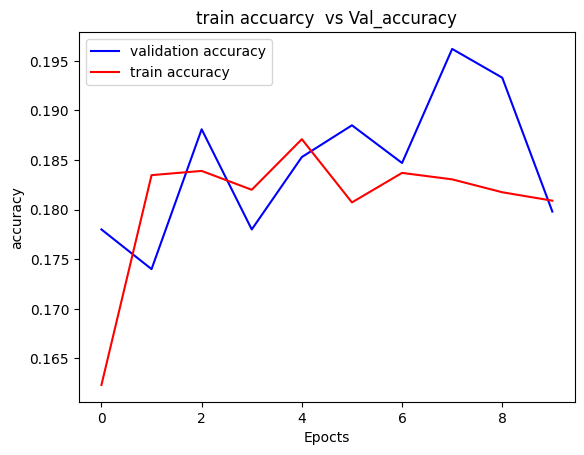

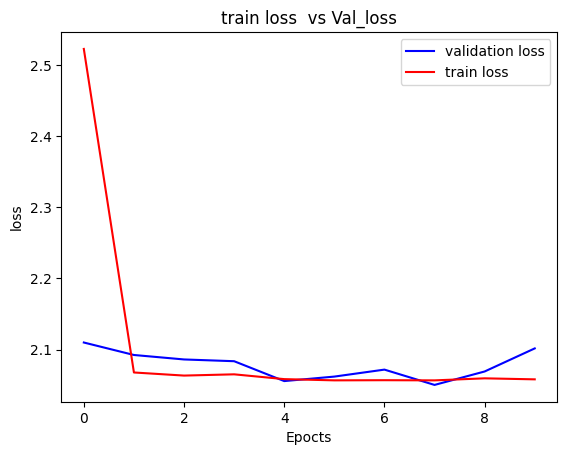

In [26]:

from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#normalize
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is:{y_train[0]}")
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)
print(f"after : label is:{y_train[0]}")


#architecture
model=Sequential()
model.add(Flatten(input_shape=(32,32,3))) 
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer = Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

#train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

#visulation 
plt.plot(result.history['val_accuracy'] , label = "validation accuracy" ,color= 'blue' )
plt.plot(result.history['accuracy'] , label = "train accuracy "  , color = "red")
plt.title("train accuarcy  vs Val_accuracy")
plt.xlabel('Epocts')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(result.history['val_loss'] , label = "validation loss" ,color= 'blue' )
plt.plot(result.history['loss'] , label = "train loss "  , color = "red")
plt.title("train loss  vs Val_loss")
plt.xlabel('Epocts')
plt.ylabel('loss')
plt.legend()
plt.show()